In [4]:
import pandas as pd #pandas for filtering and analysis
import mysql.connector #used for connecting and interacting with mysql

df = pd.read_csv(r"C:\antarcticaglobal\performance_data_ag(raw).csv") #loaded the cleaned .csv file into this dataframe (pandas)
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y") #converting the date column from string to datetime format

#cleaning up the 'incomplete leads' column
#if any value is missing (it is not, but just being safe), we replace it as None so mysql stores it as null
df['incomplete_leads'] = df['incomplete_leads'].where(pd.notna(df['incomplete_leads']), None)

#establishing connection to mysql datbase, the credentials should match your setup
conn = mysql.connector.connect(
    host="localhost",             #mysql host name here
    user="root",                  #mysql username here
    password="Workbench@ccess",   #mysql password here
    database="antarctica_global"  #add the database name here   
)

#tool that helps you run SQL commands in this database
cursor = conn.cursor()

#used a for-loop to loop through each row of this dataframe
for _, row in df.iterrows():
    values = (
        row['day'],                       #for the day-of-the-week column (varchar)
        row['date'].strftime("%Y-%m-%d"), #for the date column (already converted)
        row['associate_name'],            #name of the associate (varchar)
        row['leads'],                     #number of leads generated (int)
        row['time_spent_lead_generating'],#time spent in lead generation (int)
        row['time_per_lead'],             #time per lead spent (int)
        row['daily_team_review'],         #status of team review attendance (varchar)
        row['incomplete_leads']           #any leads that went unfinished (int)
    )

    #MYSQL command to insert values into the performance data table
    cursor.execute("""
        INSERT INTO performance_data (
            day, date, associate_name, leads,
            time_spent_lead_generating, time_per_lead,
            daily_team_review, incomplete_leads
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
    """, values)   

conn.commit() #save the changes to database 

#close the server and database connections
cursor.close()
conn.close()

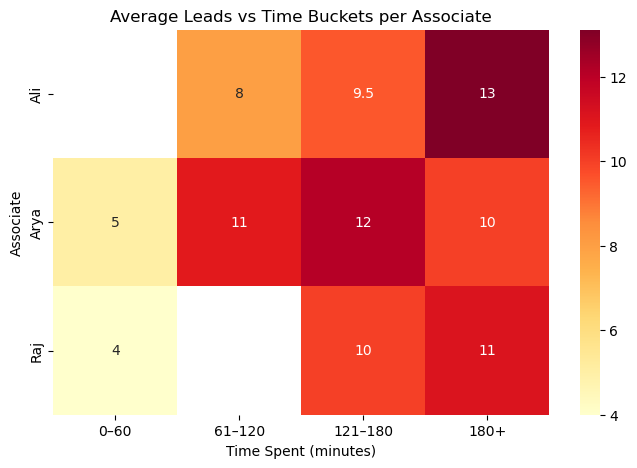

In [19]:
import pandas as pd             #pandas library foor handling my dataset
import seaborn as sns           #sns specifically for the heatmap...makes life simpler
import matplotlib.pyplot as plt #for plot window

df['time_bucket'] = pd.cut( 
#pd.cut creates the 'buckets' and assigns a label to each row
    
    df['time_spent_lead_generating'],           #the column to bucket
    bins=[0, 60, 120, 180, df['time_spent_lead_generating'].max()],
    #creating time buckets - 0-60, 60-120, 120-180 and 180 to max
    
    labels=['0–60', '61–120', '121–180', '180+'] #labels for each bucket
)
pivot = df.pivot_table(
#creating a table to find average leads per time bucket for each associate
    observed = False, 
    #disable warning pop up
    
    index='associate_name', #rows = assocaite_name
    columns='time_bucket',  #columns = time buckets
    values='leads',         #values to avearge = leads
    aggfunc='mean'          #how to calculate the average
)
plt.figure(figsize=(8, 5)) 
sns.heatmap(pivot,         #data to plot
            annot=True,    #shows the numbers inside the boxes
            cmap='YlOrRd') #colour style mentioned
plt.title("Average Leads vs Time Buckets per Associate")
#chart2 title

plt.xlabel("Time Spent (minutes)") #x-axis label name
plt.ylabel("Associate")            #y-axis label name
plt.show()                         #shows the heatmap


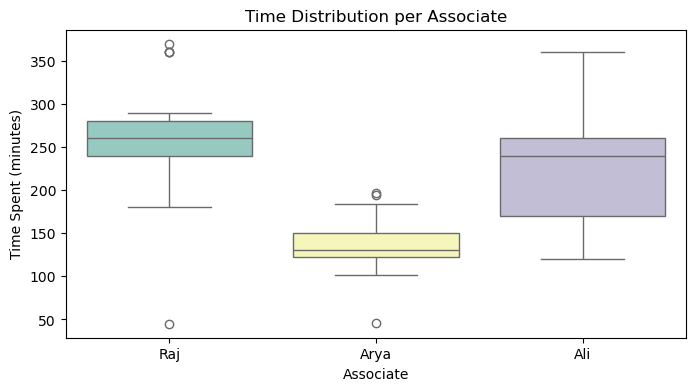

In [33]:
import pandas as pd              #for working with the dataset
import seaborn as sns            #seaborn helping us plot boxplot
import matplotlib.pyplot as plt  #for plot window

plt.figure(figsize=(8, 4))       #defines size of chart (in this case, 8x4)

sns.boxplot(
    data=df,                         #our main dataframe
    x='associate_name',              #x-axis = associates
    y='time_spent_lead_generating',  #y-axis = time spent per day
    hue = 'associate_name' ,         #hue assigns different colours based on a column
    #apparently, seaborn is heading to a newer version where 'hue' has to be assigned along with palette

    palette='Set3',                  
    #assigns different colours to each associate (soft colour theme)
    #chooses a predefined soft colour scheme from seaborn' built in colour palettes
    
    legend=False  #no need for legend since hue did the job 
                  #x-axis drafted associate ami di
)

plt.title("Time Distribution per Associate")  #chart title
plt.xlabel("Associate")                       #x-axis label
plt.ylabel("Time Spent (minutes)")            #y-axis label
plt.show()                                    #shows the chart